# Assignment 3 - Pie
---
This notebook will show how to read a csv file through a link, then create a new column with the email domains, and finally plot them in a pie chart.

This Jupyter notebook can be run at the following link:<a target="_blank" href="https://colab.research.google.com/github/FatimaBOliveira/Programming-for-data-analytics/blob/main/Assignments/assignment03-pie.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Load data and inspect
Pandas is the essential tool to load the file, found in this [link](https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download). The first rows of the DataFrame can be inspected with [.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

In [1]:
# Import pandas.
import pandas as pd

In [2]:
# Load file and check it.
df = pd.read_csv("https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download")
df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


## Create a new column
The column "Email" has the domains needed for this assignment. In this case, I created a new column, "Domain", splitting the email with [.str.split](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html), and requesting to consider the part [after the @](https://stackoverflow.com/questions/70039865/how-to-extract-domain-part-from-email-address-column-in-python-without-com).

In [3]:
# Create a new column with the email domains only.
df["Domain"] = df["Email"].str.split("@").str[1]

# Show the first 3 rows.
df.head(3)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org


## Plot
For this step, NumPy and Matplotlib are used. In this first step, I get the values and counts for each domain with [np.unique](https://numpy.org/doc/2.0/reference/generated/numpy.unique.html).

In [4]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Get the counts for domains.
domains= df["Domain"]
values, counts = np.unique(domains, return_counts=True)

# Show.
values, counts

(array(['example.com', 'example.net', 'example.org'], dtype=object),
 array([339, 320, 341], dtype=int64))

Matplotlib can reproduce highly customizable [pies](https://www.w3schools.com/python/matplotlib_pie_charts.asp). I identified the wedge size with the counts, then added the labels with the values, [percentages](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#auto-label-slices) for each slice and in different [colors](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#color-slices). Because the domain example.org is found in most samples, I used [explode](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#explode-shade-and-rotate-slices) to stand out from the others.

([<matplotlib.patches.Wedge at 0x1f44f5d7b30>,
 [Text(0.5329547602909543, 0.962267750412125, 'example.com'),
  Text(-1.099978286206642, 0.006911575355801114, 'example.net'),
  Text(0.6466475212825711, -1.185051468594975, 'example.org')],
 [Text(0.2907025965223387, 0.5248733184066136, '33.9%'),
  Text(-0.5999881561127138, 0.003769950194073334, '32.0%'),
  Text(0.40714843932606326, -0.7461435172635027, '34.1%')])

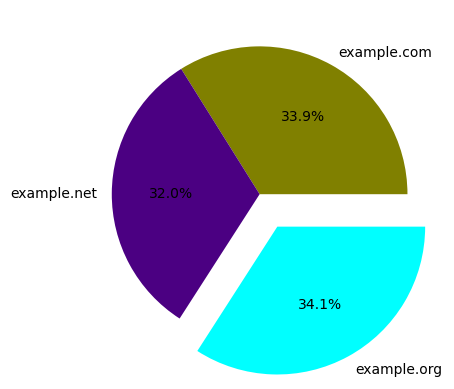

In [5]:
# Plot pie.
plt.pie(counts, labels = values, autopct="%1.1f%%", colors=["olive","indigo","cyan"], explode=(0,0,0.25))

____
## End